**Ноутбук для первичного анализа данных, определения дальнейших шагов по разработке сервиса для предсказания "измены" партнёра.**

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from colorama import Fore, Style


sns.set_theme(style='white')

In [2]:
current_directory = Path.cwd()
RAW_DATA_PATH = current_directory.parent / 'data/raw/affair_data.csv'

In [3]:
raw_data = pd.read_csv(RAW_DATA_PATH)
raw_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


# Первичный анализ данных

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


Датасет состоит из 6366 строк и 9 признаков, все признаки имеют числовой тип данных. На первый взгялд пропуски отсутствуют.
Таргетом нашей задачи является признак "affairs", который в дальнейшем мы будем классифицировать.

In [5]:
max_column_length = max(len(column) for column in raw_data.columns)

for column in raw_data.columns:
    unique_values = raw_data[column].unique()
    padding = ' ' * (max_column_length - len(column))
    print(f"{Style.BRIGHT}Уникальные значения для столбца{Style.RESET_ALL} '{Fore.BLUE}{column}{Style.RESET_ALL}':{padding} {', '.join(map(str, unique_values))}")

Уникальные значения для столбца 'rate_marriage':   3.0, 4.0, 5.0, 2.0, 1.0
Уникальные значения для столбца 'age':             32.0, 27.0, 22.0, 37.0, 42.0, 17.5
Уникальные значения для столбца 'yrs_married':     9.0, 13.0, 2.5, 16.5, 23.0, 6.0, 0.5
Уникальные значения для столбца 'children':        3.0, 0.0, 4.0, 1.0, 5.5, 2.0
Уникальные значения для столбца 'religious':       3.0, 1.0, 2.0, 4.0
Уникальные значения для столбца 'educ':            17.0, 14.0, 16.0, 12.0, 20.0, 9.0
Уникальные значения для столбца 'occupation':      2.0, 3.0, 5.0, 4.0, 1.0, 6.0
Уникальные значения для столбца 'occupation_husb': 5.0, 4.0, 3.0, 2.0, 6.0, 1.0
Уникальные значения для столбца 'affairs':         1, 0


Проверили уникальные значений каждого признака, отсутствуют символы, например, "?", "." e.t.c., которыми авторы датасетов обозначают пропущенные значения. Теперь с уверенностью можно сказать, что датасет целый.

In [6]:
raw_data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


# Визуализация

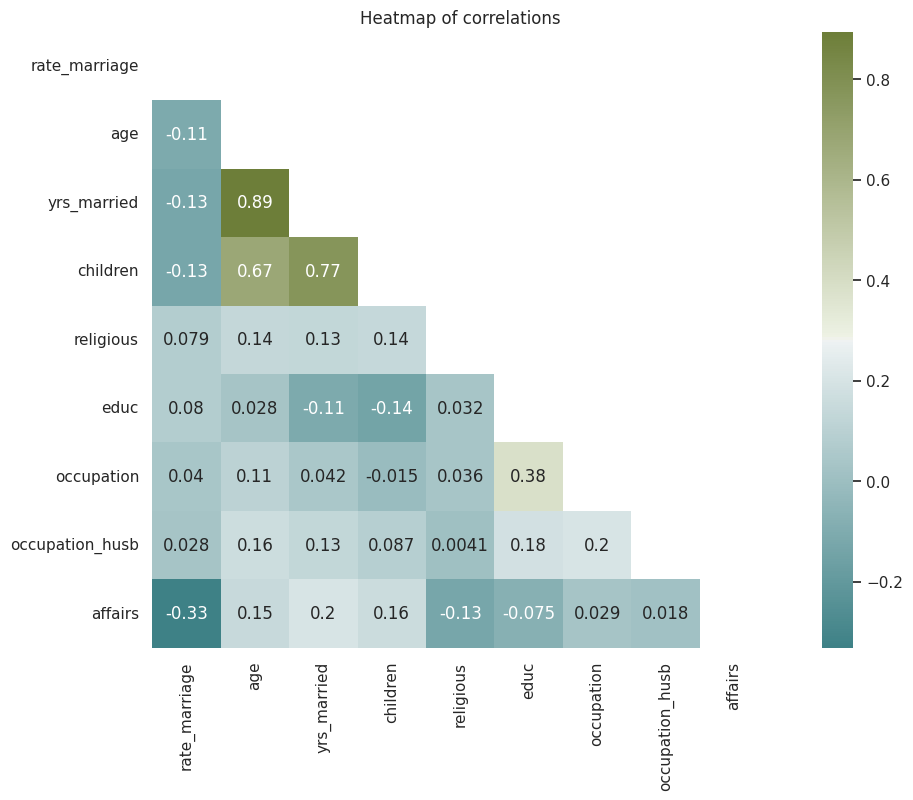

In [7]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.title('Heatmap of correlations')
mask = np.triu(np.ones_like(raw_data.corr(), dtype=bool))
cmap = sns.diverging_palette(200, 100, as_cmap=True)
sns.heatmap(raw_data.corr(), mask=mask, cmap=cmap, square=True, annot=True, fmt='.2g')
plt.show()

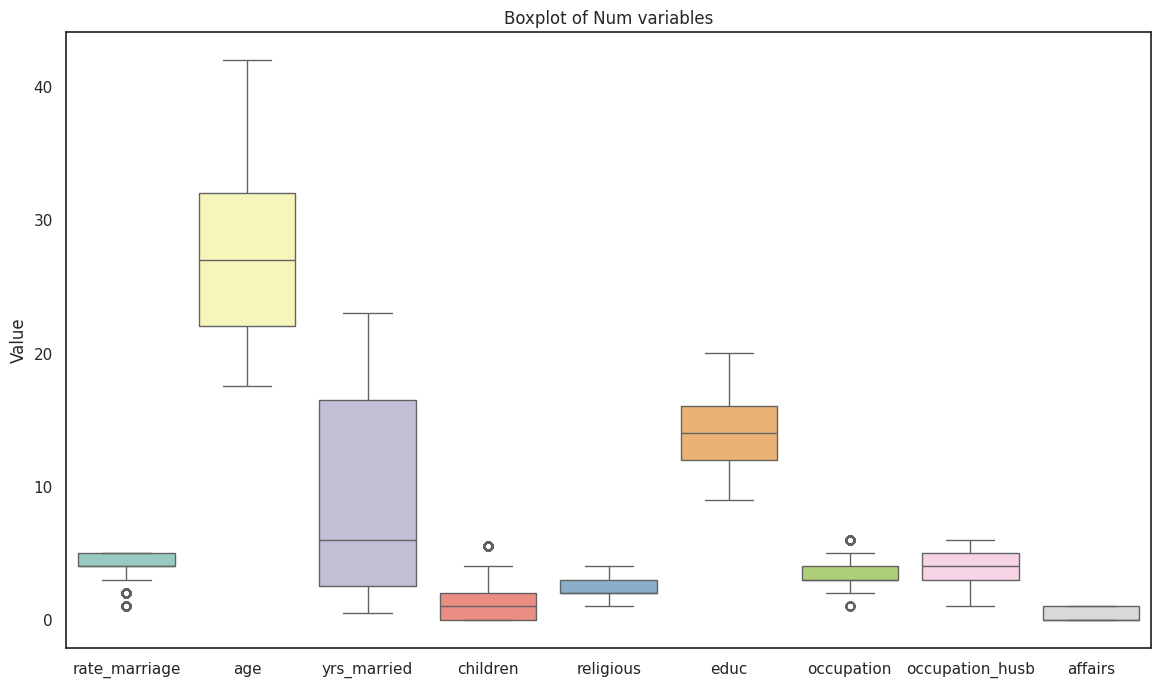

In [22]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=raw_data, palette='Set3')
plt.title('Boxplot of Num variables')
plt.ylabel('Value')
plt.show()

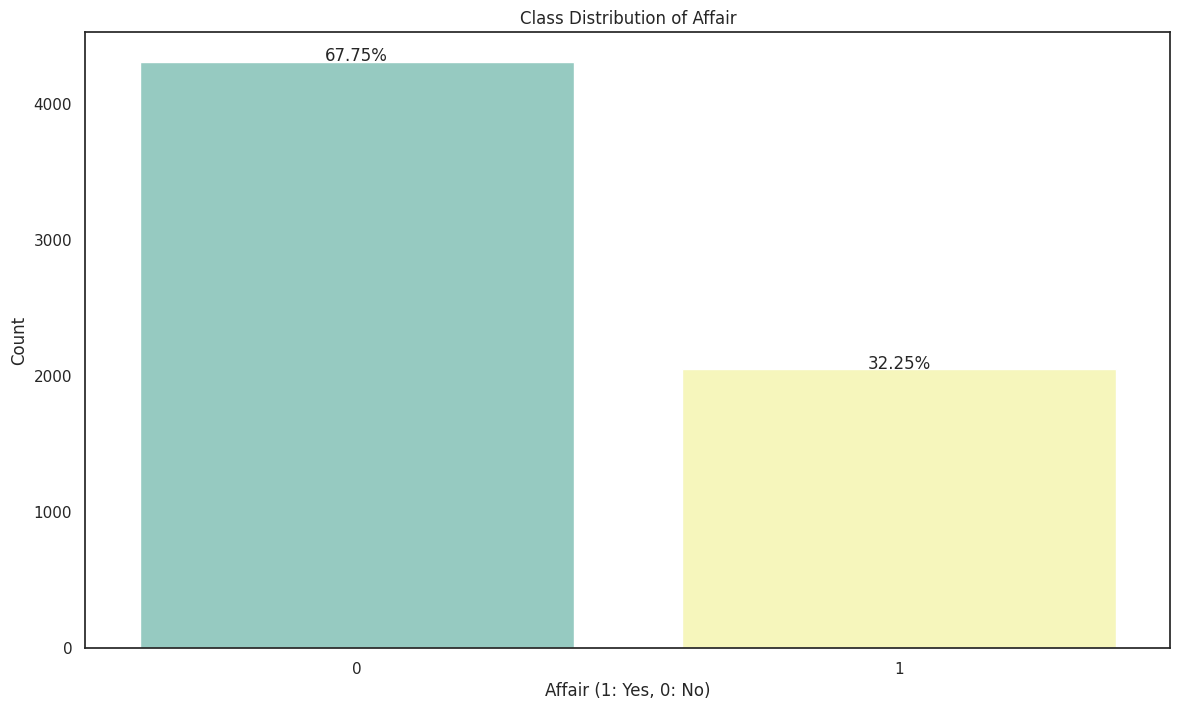

In [20]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(data=raw_data, x='affairs', hue='affairs', palette='Set3', legend=False)

plt.title('Class Distribution of Affair')
plt.xlabel('Affair (1: Yes, 0: No)')
plt.ylabel('Count')

total = float(len(raw_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.show()

In [10]:
# selected_columns = [col for col in raw_data.columns if col != 'affairs']

# for feature in selected_columns:
#     plt.figure(figsize=(12, 8))
#     sns.histplot(raw_data[feature], kde=True, color='green')
#     plt.title(f'Distribution of {feature}', fontsize=16)
#     plt.xlabel(feature, fontsize=14)
#     plt.ylabel('Frequency', fontsize=14)
#     plt.tick_params(axis='both', which='major', labelsize=12)
#     plt.show()

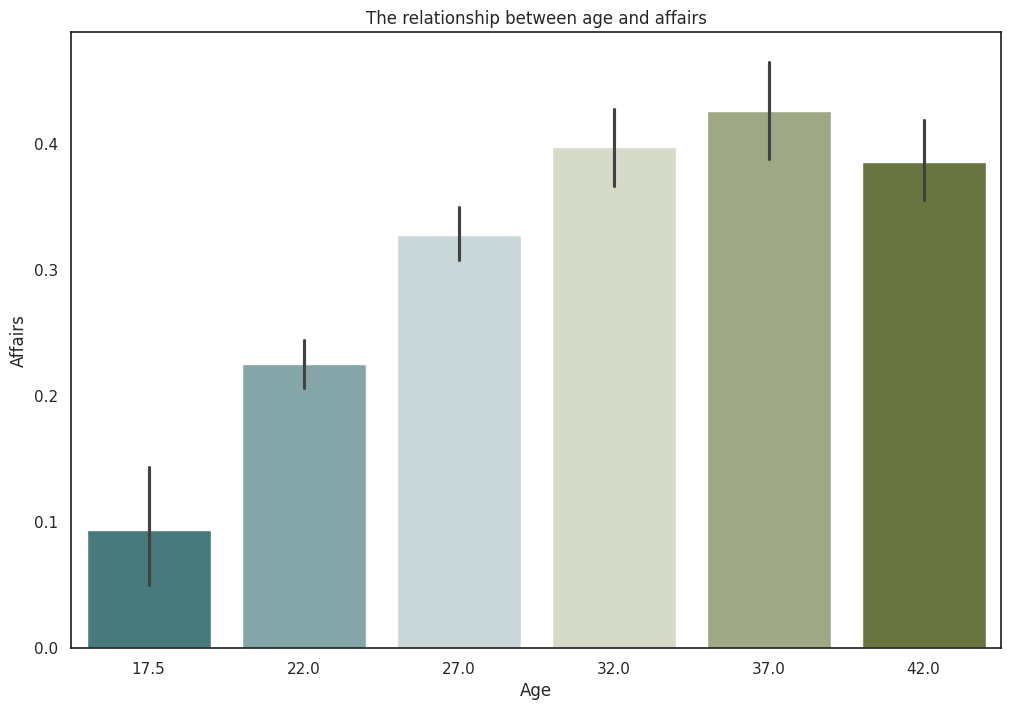

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='affairs', hue='age', legend=False, data=raw_data, palette=cmap)
plt.title('The relationship between age and affairs')
plt.xlabel('Age')
plt.ylabel('Affairs')
plt.show()

Эта диаграмма свидетельствует нам о том, что чем старше мужчина - тем чаще он вступает во внебрачные отношения.

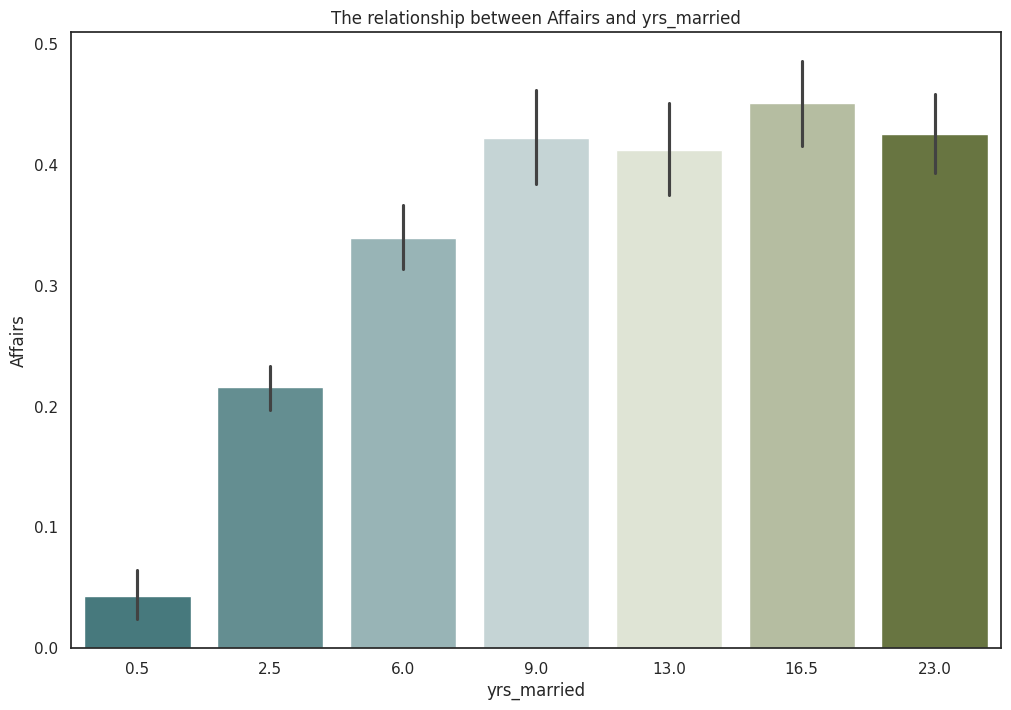

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='yrs_married', y='affairs', hue='yrs_married', legend=False, data=raw_data, palette=cmap)
plt.title('The relationship between Affairs and yrs_married')
plt.xlabel('yrs_married')
plt.ylabel('Affairs')
plt.show()

Здесь мы видим, что с увеличением количества лет брака - шанс измены возрастает.

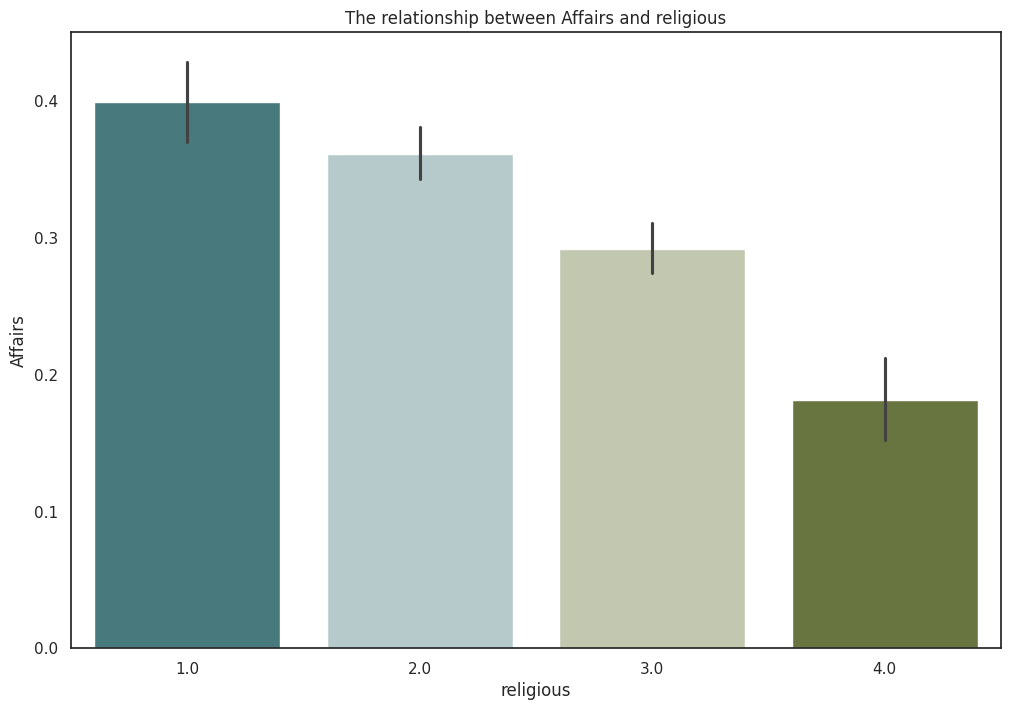

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='religious', y='affairs', hue='religious', legend=False, data=raw_data, palette=cmap)
plt.title('The relationship between Affairs and religious')
plt.xlabel('religious')
plt.ylabel('Affairs')
plt.show()

Признак веры играет сильную обратную связь на шанс измены. Чемы выше уровень религиозности - тем меньше шанс завести роман.